# Isotropic Diffusion via Heat Equation

## import library

In [389]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cv2

## load image 

In [390]:
I_color = cv2.imread('4.png', cv2.IMREAD_COLOR)   # load color image
I_color = cv2.cvtColor(I_color, cv2.COLOR_BGR2RGB)

## check the size of image and convert 3D to 2D if necessary

number of dimension =  2
number of rows =  800
number of columns =  640


(-0.5, 639.5, 799.5, -0.5)

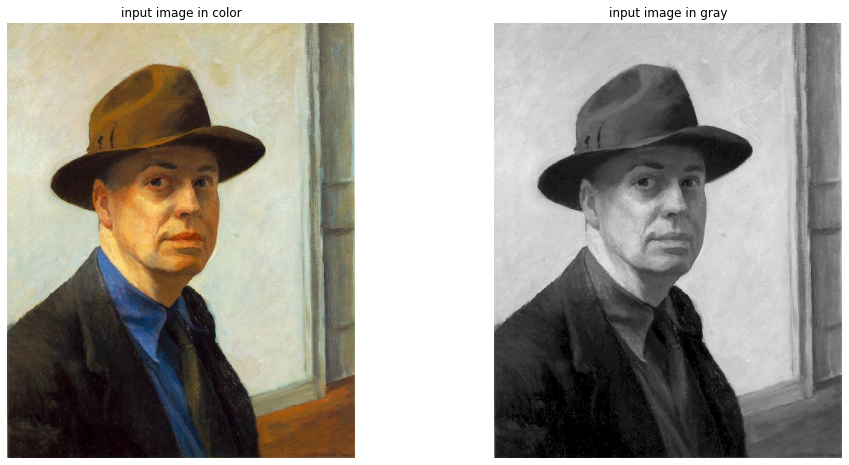

In [391]:
n_dimension = I_color.shape[2]      # number of dimension of data

if n_dimension == 3:
    I = cv2.imread('4.png', cv2.IMREAD_GRAYSCALE)

    #I           = I_color.????(2) # convert 3-d data to 2-d data by taking average over the depth axis
n_dimension = 2             # number of dimension of the convered data
n_row       = I.shape[0]    # number of rows of data
n_column    = I.shape[1]    # number of columns of data


print("number of dimension = ", n_dimension)
print("number of rows = ", n_row)
print("number of columns = ", n_column)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(I_color)
plt.title('input image in color')
plt.axis('off')

plt.subplot(122)
plt.imshow(I, cmap = 'gray')
plt.title('input image in gray')
plt.axis('off')

```git commit -a -m "load image and check its size" ```

```git push origin master```

## normalize input image so that the range of image is $[0, 1]$

In [392]:
I_norm = cv2.normalize(I, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
pix = np.array(I_norm)

```git commit -a -m "normalise data" ```

```git push origin master```

## define a function to compute the first-order derivatives with Neumann boundary condition

(-0.5, 639.5, 799.5, -0.5)

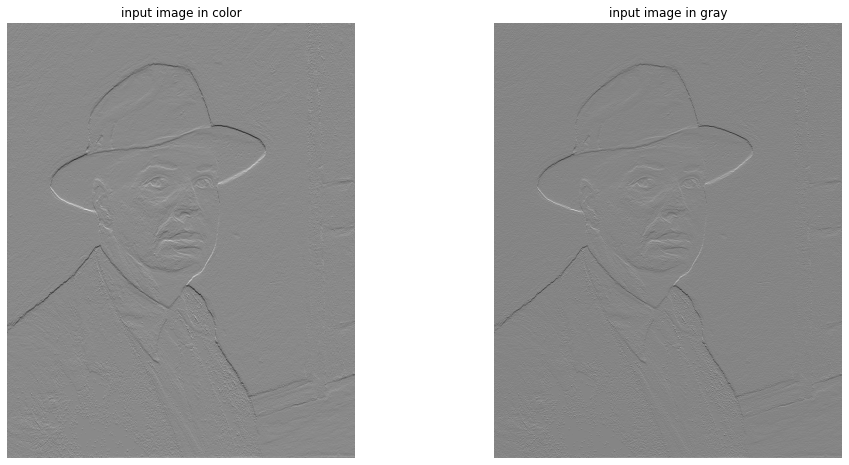

In [427]:
def compute_derivative_first_order(data, axis, scheme, boundary):
    global derivative
    if boundary == 'neumann':

        D = np.pad(data, (1, 1), mode='edge') # use numpy.pad function

    if axis == 'x':

        if scheme == 'forward':
            
            D_normforward = D
            D_normforward = D_normforward[2: 802, 1: 641]
            derivative = D_normforward - data
            
        elif scheme == 'backward':
            
            D_normbackward = D
            D_normbackward = D_normbackward[0: 800, 1: 641]
            derivative = data - D_normbackward
            
        else:   # scheme == central
            
            D_normforward = D
            D_normforward = D_normforward[2: 802, 1: 641]
            derivative1 = D_normforward - data
            
            D_normbackward = D
            D_normbackward = D_normbackward[0: 800, 1: 641]
            derivative2 = data - D_normbackward

            derivative = (derivative1 + derivative2) / 2
        
    elif axis == 'y':

        if scheme == 'forward':
            
            D_normforward = D
            D_normforward = D_normforward[1: 801, 2: 642]
            derivative = D_normforward - data

        elif scheme == 'backward':
            
            D_normbackward = D
            D_normbackward = D_normbackward[1: 801, 0: 640]
            derivative = data - D_normbackward
            
        else:   # scheme == central
            
            D_normforward = D
            D_normforward = D_normforward[1: 801, 2: 642]
            derivative1 = D_normforward - data
            
            D_normbackward = D
            D_normbackward = D_normbackward[1: 801, 0: 640]
            derivative2 = data - D_normbackward
            
            derivative = (derivative1 + derivative2) / 2
        
    dD = derivative   # remove the first and the last rows and columns for the boundary condition

    return(dD)
D_forward   = compute_derivative_first_order(pix, 'x', 'center', 'neumann')

D_backward  = compute_derivative_first_order(pix, 'x', 'backward', 'neumann')
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(D_forward, cmap = 'gray')
plt.title('input image in color')
plt.axis('off')

plt.subplot(122)
plt.imshow(D_backward, cmap = 'gray')
plt.title('input image in gray')
plt.axis('off')

```git commit -a -m "define a function for computing the first-order derivative" ```

```git push origin master```

## define a function to compute the second-order derivatives with Neumann boundary condition

(-0.5, 639.5, 799.5, -0.5)

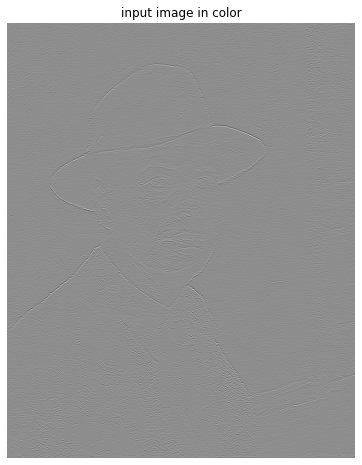

In [428]:
def compute_derivative_second_order(data, axis):

    D_forward   = compute_derivative_first_order(data, axis, 'forward', 'neumann')
    D_backward  = compute_derivative_first_order(data, axis, 'backward', 'neumann')
    
    dDdD  = (D_forward - D_backward)  # use the above D_forward and D_backward

    return(dDdD)

deriv = compute_derivative_second_order(pix, 'x')
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(deriv, cmap = 'gray')
plt.title('input image in color')
plt.axis('off')

```git commit -a -m "define a function for computing the second-order derivative" ```

```git push origin master```

## define a function to compute heat equation

(-0.5, 639.5, 799.5, -0.5)

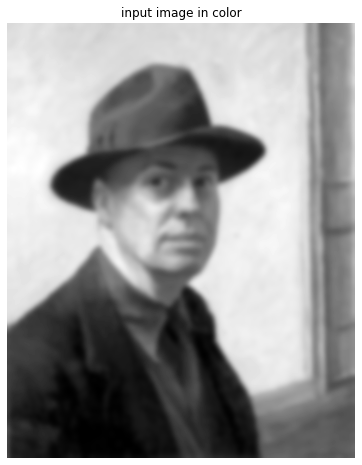

In [429]:
def heat_equation(data, delta_t, number_iteration):

    u = data  # initialisation
    h = 1

    for t in range(number_iteration):
        u_x_forward = compute_derivative_first_order(u,'x','forward','neumann')
        u_x_backward = compute_derivative_first_order(u, 'x','backward', 'neumann')
        u_y_forward = compute_derivative_first_order(u, 'y','forward', 'neumann')
        u_y_backward = compute_derivative_first_order(u, 'y','backward', 'neumann')
        laplace = (u_x_forward-u_x_backward+u_y_forward-u_y_backward) / h   # use the above defined functions
        u       = u + delta_t*laplace   # compute the heat equation u(t+1) = u(t) + delta_t * laplace(u) 

    return(u)
x = heat_equation(pix, 0.1, 100)
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(x, cmap = 'gray')
plt.title('input image in color')
plt.axis('off')

(-0.5, 639.5, 799.5, -0.5)

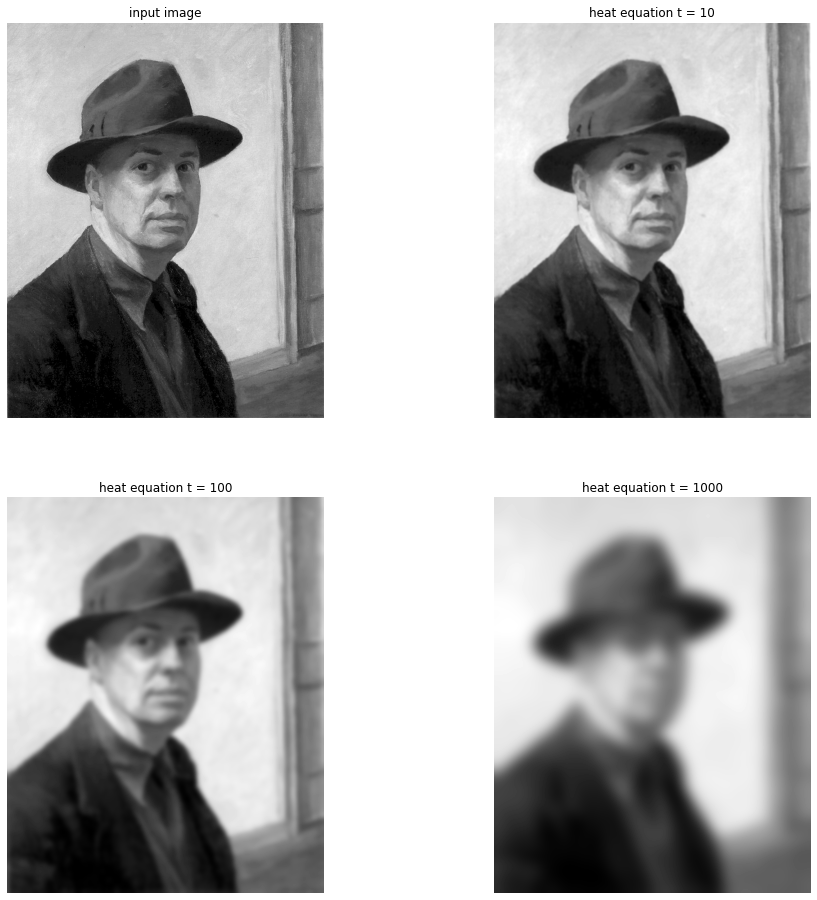

In [430]:
delta_t = 0.1   # delta t in the computation of heat equation

u10     = heat_equation(pix, delta_t, 10)     # compute heat equation with 10 iterations

u100    = heat_equation(pix, delta_t, 100)    # compute heat equation with 100 iterations

u1000   = heat_equation(pix, delta_t, 1000)   # compute heat equation with 1000 iterations

plt.figure(figsize=(16,16))

# visualise the original image
plt.subplot(221)
plt.imshow(pix, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

```git commit -a -m "compute the heat equation"```

```git push origin master```

## compute the (forward) first-order derivative of the solutions obtained by heat equation

(-0.5, 639.5, 799.5, -0.5)

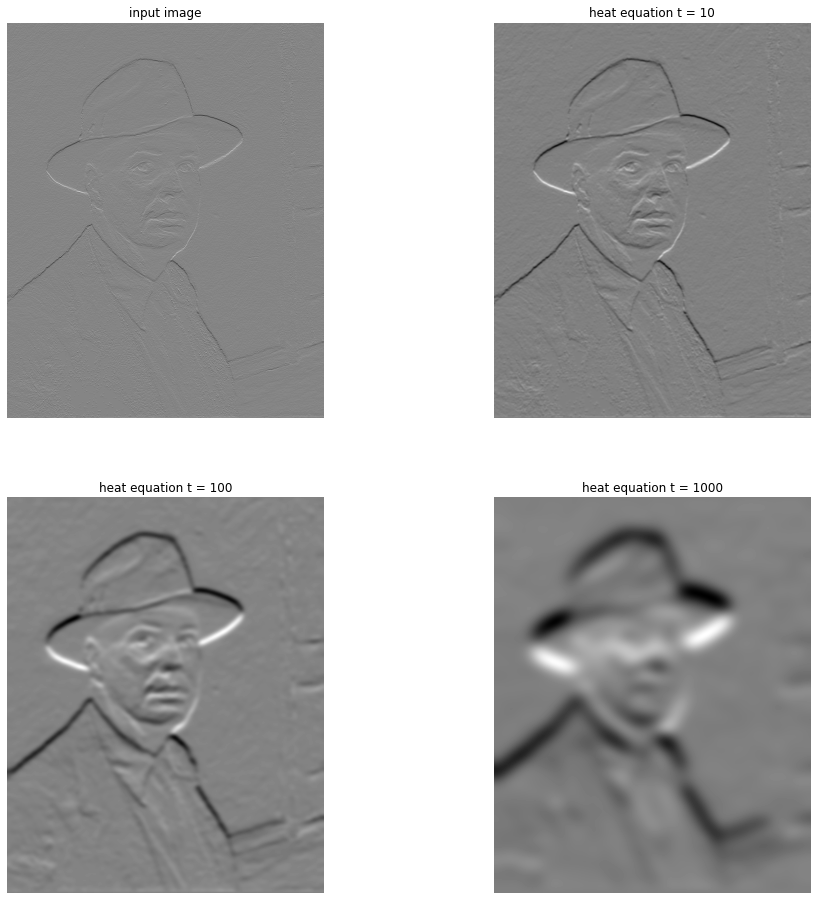

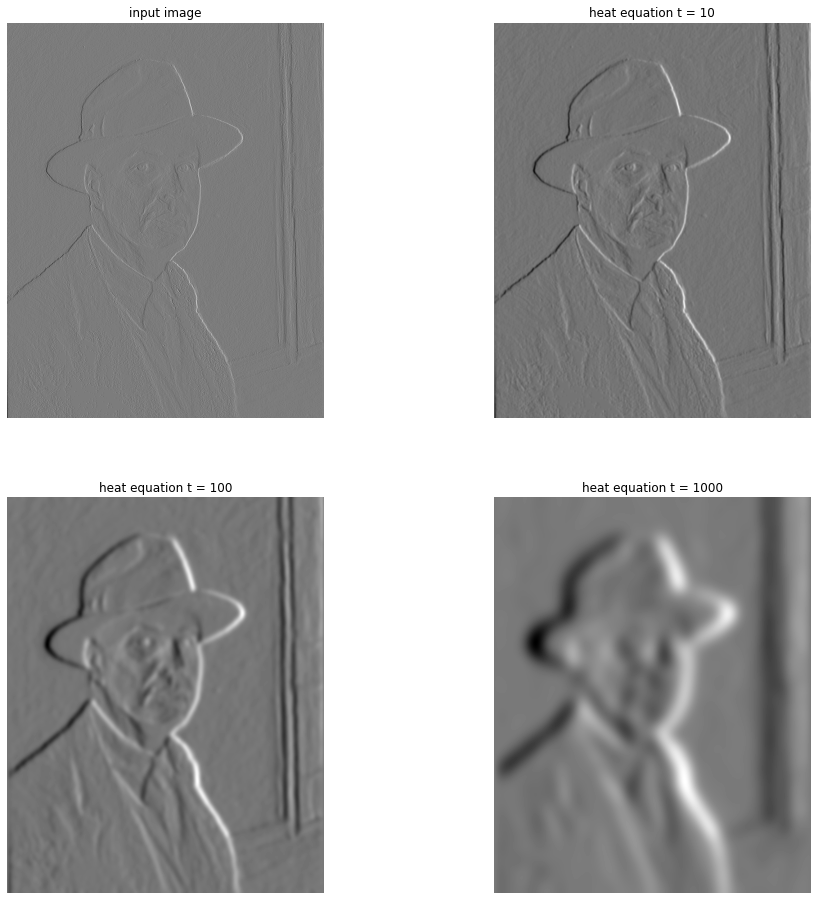

In [431]:
Ix      = compute_derivative_first_order(pix, 'x', 'forward', 'neumann')   # compute I_x using forward scheme
Iy      = compute_derivative_first_order(pix, 'y', 'forward', 'neumann')   # compute I_y using forward scheme

u10_x   = compute_derivative_first_order(u10, 'x', 'forward', 'neumann')   # compute u(10)_x using forward scheme
u10_y   = compute_derivative_first_order(u10, 'y', 'backward', 'neumann')   # compute u(10)_y using forward scheme

u100_x  = compute_derivative_first_order(u100, 'x', 'forward', 'neumann')   # compute u(100)_x using forward scheme
u100_y  = compute_derivative_first_order(u100, 'y', 'backward', 'neumann')   # compute u(100)_y using forward scheme

u1000_x = compute_derivative_first_order(u1000, 'x', 'forward', 'neumann')   # compute u(1000)_x using forward scheme
u1000_y = compute_derivative_first_order(u1000, 'y', 'backward', 'neumann')   # compute u(1000)_y using forward scheme

plt.figure(figsize=(16,16))

# visualise the first-order derivative in x-axis of the original image
plt.subplot(221)
plt.imshow(Ix, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the first-order derivative in x-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_x, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the first-order derivative in x-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_x, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the first-order derivative in x-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_x, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

plt.figure(figsize=(16,16))

# visualise the first-order derivative in y-axis of the original image
plt.subplot(221)
plt.imshow(Iy, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the first-order derivative in y-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_y, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the first-order derivative in y-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_y, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the first-order derivative in y-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_y, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

```git commit -a -m "compute the first-order derivative of the solution from the heat equations"```

```git push origin master```

## compute the second-order derivative of the solutions obtained by heat equation

In [ ]:
Ixx         = compute_derivative_second_order(I, ???)   # compute second derivative I_xx in x-direction
Iyy         = compute_derivative_second_order(I, ???)   # compute second derivative I_yy in y-direction

u10_xx      = compute_derivative_second_order(u10, ???)   # compute second derivative u(10)_xx in x-direction
u10_yy      = compute_derivative_second_order(u10, ???)   # compute second derivative u(10)_yy in y-direction

u100_xx     = compute_derivative_second_order(u100, ???)   # compute second derivative u(100)_xx in x-direction
u100_yy     = compute_derivative_second_order(u100, ???)   # compute second derivative u(100)_yy in y-direction

u1000_xx    = compute_derivative_second_order(u1000, ???)   # compute second derivative u(1000)_xx in x-direction
u1000_yy    = compute_derivative_second_order(u1000, ???)   # compute second derivative u(1000)_yy in y-direction

plt.figure(figsize=(16,16))

# visualise the second-order derivative in x-axis of the original image
plt.subplot(221)
plt.imshow(Ixx, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the second-order derivative in x-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_xx, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the second-order derivative in x-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_xx, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the second-order derivative in x-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_xx, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')

plt.figure(figsize=(16,16))

# visualise the second-order derivative in y-axis of the original image
plt.subplot(221)
plt.imshow(Iyy, cmap='gray')
plt.title('input image')
plt.axis('off')

# visualise the second-order derivative in y-axis of the results of heat equation with 10 iterations
plt.subplot(222)
plt.imshow(u10_yy, cmap='gray')
plt.title('heat equation t = 10')
plt.axis('off')

# visualise the second-order derivative in y-axis of the results of heat equation with 100 iterations
plt.subplot(223)
plt.imshow(u100_yy, cmap='gray')
plt.title('heat equation t = 100')
plt.axis('off')

# visualise the second-order derivative in y-axis of the results of heat equation with 1000 iterations
plt.subplot(224)
plt.imshow(u1000_yy, cmap='gray')
plt.title('heat equation t = 1000')
plt.axis('off')




```git commit -a -m "compute the second-order derivative of the solution from the heat equations"```

```git push origin master```

## define functions for the visualization

In [ ]:
def plot_image_color(I, title = 'title'):
    
    plt.figure(figsize=(8,8))
    plt.imshow(I)
    plt.title(title)
    plt.axis('off')
        
def plot_image_gray(I, title = 'title'):
    
    plt.figure(figsize=(8,8))
    plt.imshow(I, cmap='gray')
    plt.title(title)
    plt.axis('off')
    
def plot_image_gray_2x1(I1, I2, title1 = 'title 1', title2 = 'title 2'):
    
    plt.figure(figsize=(16,8))

    plt.subplot(121)
    plt.imshow(I1, cmap = 'gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(I2, cmap = 'gray')
    plt.title(title2)
    plt.axis('off')

def plot_image_gray_2x2(I1, I2, I3, I4, title1 = 'title 1', title2 = 'title 2', title3 = 'title 3', title4 = 'title 4'):
    
    plt.figure(figsize=(16,16))

    plt.subplot(221)
    plt.imshow(I1, cmap = 'gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(I2, cmap = 'gray')
    plt.title(title2)
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(I3, cmap = 'gray')
    plt.title(title3)
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(I4, cmap = 'gray')
    plt.title(title4)
    plt.axis('off')

```git commit -a -m "define functions for the visualization"```

```git push origin master```

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# # results

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

### # 01. plot the input image in color

In [ ]:
plot_image_color(I_color, 'input image in color')

### # 02. plot the input image in gray

In [ ]:
plot_image_gray(I, 'input image in grey')

### # 03. plot the (forward) first derivative $I_x$ and $I_y$ of input gray image $I$ with Neumann boundary condition

In [ ]:
plot_image_gray_2x1(Ix, Iy, '$I_x$','$I_y$')

### # 04. plot the second derivative $I_{xx}$ and $I_{yy}$ of input gray image $I$ with Neumann boundary condition

In [ ]:
plot_image_gray_2x1(Ixx, Iyy, '$I_{xx}$', '$I_{yy}$')

### # 05. plot the original image and its solution of the heat equation with 10, 100, 1000 iterations

In [ ]:
plot_image_gray_2x2(I, u10, u100, u1000, 'original $I$', '$u(t=10)$', '$u(t=100)$', '$u(t=1000)$')

### # 06. plot the (forward) first derivative of the solution of the heat equation with 10 iterations

In [ ]:
plot_image_gray_2x1(u10_x, u10_y, '$u_x(t=10)$', '$u_y(t=10)$')

### # 07. plot the (forward) first derivative of the solution of the heat equation with 100 iterations

In [ ]:
plot_image_gray_2x1(u100_x, u100_y, '$u_x(t=100)$', '$u_y(t=100)$')

### # 08. plot the (forward) first derivative of the solution of the heat equation with 1000 iterations

In [ ]:
plot_image_gray_2x1(u1000_x, u1000_y, '$u_x(t=1000)$', '$u_y(t=1000)$')